# SSD

## MMDetection

In [1]:
!nvcc --version

/bin/bash: nvcc: команда не найдена


In [2]:
!gcc --version

gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [3]:
!nvidia-smi

Sun May  8 17:47:15 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  N/A |
| N/A   47C    P0    33W /  N/A |    409MiB /  6144MiB |      5%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
# install dependencies: (use cu101 because colab has CUDA 10.1)
#!pip install -U torch==1.5.1+cu101 torchvision==0.6.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install mmcv-full thus we could use CUDA operators
#!pip install mmcv-full

# Install mmdetection
#%cd CourseWork/
#!rm -rf mmdetection
#!git clone https://github.com/open-mmlab/mmdetection.git
#%cd mmdetection

#!pip install -e .

# install Pillow 7.0.0 back in order to avoid bug in colab
#!pip install Pillow==7.0.0

In [1]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

import mmdet
print(mmdet.__version__)

from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

1.11.0 True
2.24.1
11.3
GCC 9.4


## Inference

MMDetection обладает высокоуровневым API для реализации вычислений и обучени сети

Можно загрузить предобученную на датасете MS COCO модель SSD300

In [6]:
!pwd

/home/drapeykonik


In [7]:
!ls

 anaconda3			    'Programming Technologies (PT)'
 application_ui.py		     PythonCourse
 CLionProjects			     RSSCourse
 CourseProject			     snap
 CourseWork			     Видео
'DisciplinesOfSpecialization (DS)'   Документы
 DLSCourse			     Загрузки
 mlcourse.ai			     Изображения
 MLExamples			     Музыка
 NAM				     Общедоступные
 nltk_data			    'Рабочий стол'
 NVIDIA_CUDA-11.3_Samples	     Шаблоны
'Optimization Methods (OM)'


In [2]:
%cd CourseWork/

/home/drapeykonik/CourseWork


In [9]:
!mkdir checkpoints

mkdir: невозможно создать каталог «checkpoints»: Файл существует


In [10]:
!ls

 autoriaNumberplateDataset-2018-11-20  'OCR[Belarus].zip'
 checkpoints			        ssd_exps
'Detection[EU].zip'		       'SSD_Training_and_Inference (1).ipynb'
 mmdetection


In [11]:
!wget -c https://download.openmmlab.com/mmdetection/v2.0/ssd/ssd300_coco/ssd300_coco_20210803_015428-d231a06e.pth \
      -O checkpoints/ssd300_coco_20210803_015428-d231a06e.pth

--2022-05-08 17:47:18--  https://download.openmmlab.com/mmdetection/v2.0/ssd/ssd300_coco/ssd300_coco_20210803_015428-d231a06e.pth
Распознаётся download.openmmlab.com (download.openmmlab.com)... 47.254.186.233
Подключение к download.openmmlab.com (download.openmmlab.com)|47.254.186.233|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа... 200 OK

    Файл уже получен полностью; нет действий.



In [12]:
!ls checkpoints

ssd300_coco_20210803_015428-d231a06e.pth


Будем использовать методы API этого фреймворка для инициализации модели, тестирования и визуализации предсказаний

SSD300:

load checkpoint from local path: checkpoints/ssd300_coco_20210803_015428-d231a06e.pth


/home/drapeykonik/anaconda3/envs/myenv/lib/python3.9/site-packages/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(
/home/drapeykonik/anaconda3/envs/myenv/lib/python3.9/site-packages/torch/nn/functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


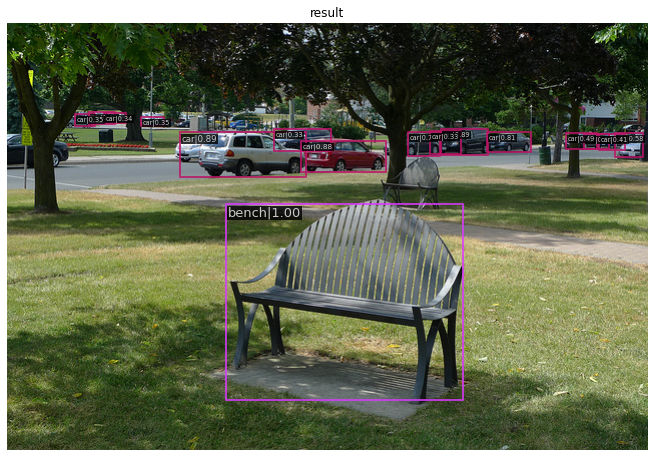

In [3]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

img = 'mmdetection/demo/demo.jpg'
config = 'mmdetection/configs/ssd/ssd300_coco.py'
checkpoint = 'checkpoints/ssd300_coco_20210803_015428-d231a06e.pth'
model = init_detector(config, checkpoint, device='cuda:0')
result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.3)

In [4]:
!ls checkpoints

ssd300_coco_20210803_015428-d231a06e.pth


## Training and testing

Для выполнения обучения нового детектора нужно сделать три вещи:
1. Определить новый датасет
2. Изменить config
3. Выполнить обучение нового детектора

### Определение нового датасета

Есть ты способа это сделать в MMDetection
1. Реорганизовать датасет в формат датасета COCO
2. Реорганизовать датасет в middle-формат
3. Реализовать новый датасет

In [15]:
#!unzip Detection\[EU\].zip 

In [16]:
#!apt-get -q install tree
!tree autoriaNumberplateDataset-2018-11-20/

autoriaNumberplateDataset-2018-11-20/
├── license.txt
├── train
│   ├── 108459186orig.jpeg
│   ├── 109698398orig.jpeg
│   ├── 111524116orig.jpeg
│   ├── 111524136orig.jpeg
│   ├── 111524140orig.jpeg
│   ├── 111524144orig.jpeg
│   ├── 115086914orig.jpeg
│   ├── 119183915orig.jpeg
│   ├── 124228322orig.jpeg
│   ├── 131303356orig.jpeg
│   ├── 134790622orig.jpeg
│   ├── 136366223orig.jpeg
│   ├── 136645445orig.jpeg
│   ├── 137762363orig.jpeg
│   ├── 138652976orig.jpeg
│   ├── 144322524orig.jpeg
│   ├── 144784391orig.jpeg
│   ├── 145288247orig.jpeg
│   ├── 148600372orig.jpeg
│   ├── 151828954orig.jpeg
│   ├── 153377169orig.jpeg
│   ├── 153377179orig.jpeg
│   ├── 154275863orig.jpeg
│   ├── 162543106orig.jpeg
│   ├── 162543180orig.jpeg
│   ├── 162786227orig.jpeg
│   ├── 162786295orig.jpeg
│   ├── 164873287orig.jpeg
│   ├── 168486365orig.jpeg
│   ├── 174767501orig.jpeg
│   ├── 176484528orig.jpeg
│   ├── 176667085orig.jpeg
│   ├── 176667089orig.jpeg
│   ├── 178155269orig.jpeg
│   ├── 179132624o

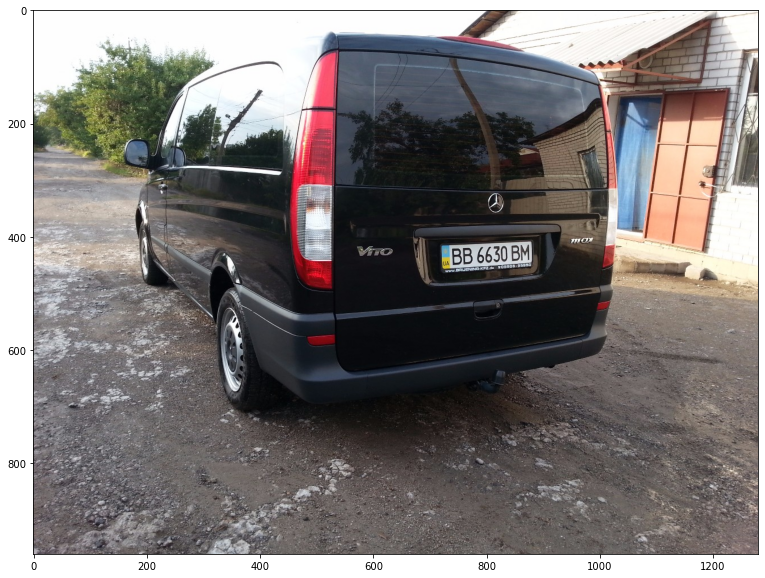

In [5]:
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('autoriaNumberplateDataset-2018-11-20/train/136645445orig.jpeg')
plt.figure(figsize=(15, 10))
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

In [7]:
!cat autoriaNumberplateDataset-2018-11-20/train/via_region_data.json

Streaming output truncated to the last 5000 lines.
          "shape_attributes": {
            "name": "polygon",
            "all_points_x": [
              346,
              195,
              201,
              354
            ],
            "all_points_y": [
              505,
              449,
              407,
              458
            ]
          }
        }
      ],
      "size": 0
    },
    "250032688orig.jpeg": {
      "file_attributes": {},
      "filename": "250032688orig.jpeg",
      "regions": [
        {
          "region_attributes": {},
          "shape_attributes": {
            "name": "polygon",
            "all_points_x": [
              1242,
              713,
              713,
              1249
            ],
            "all_points_y": [
              1112,
              1096,
              1016,
              1025
            ]
          }
        }
      ],
      "size": 0
    },
    "250032237orig.jpeg": {
      "file_attributes": {},
      "filena

In [6]:
import json 
with open("autoriaNumberplateDataset-2018-11-20/train/via_region_data.json") as f:
  ann = json.load(f)
  for t, a in ann["_via_img_metadata"].items():
    print(t)
    for t1, a1 in a.items():
      print(t1, " - ", a1)
    print()

Streaming output truncated to the last 5000 lines.
size  -  0

250027494orig.jpeg
file_attributes  -  {}
filename  -  250027494orig.jpeg
regions  -  [{'shape_attributes': {'name': 'polygon', 'all_points_x': [286, 282, 484, 489], 'all_points_y': [476, 526, 553, 495]}, 'region_attributes': {}}]
size  -  0

250037044orig.jpeg
file_attributes  -  {}
filename  -  250037044orig.jpeg
regions  -  [{'shape_attributes': {'name': 'polygon', 'all_points_x': [1677, 1666, 1828, 1838], 'all_points_y': [1060, 1129, 970, 909]}, 'region_attributes': {}}]
size  -  0

250018261orig.jpeg
file_attributes  -  {}
filename  -  250018261orig.jpeg
regions  -  [{'region_attributes': {}, 'shape_attributes': {'name': 'polygon', 'all_points_x': [888, 493, 499, 900], 'all_points_y': [688, 658, 588, 619]}}]
size  -  0

248115228orig.jpeg
file_attributes  -  {}
filename  -  248115228orig.jpeg
regions  -  [{'region_attributes': {}, 'shape_attributes': {'name': 'polygon', 'all_points_x': [325, 234, 233, 325], 'all_points

#### Middle format

```python
[
    {
        'filename': 'a.jpg',
        'width': 1280,
        'height': 720,
        'ann': {
            'bboxes': <np.ndarray> (n, 4),
            'labels': <np.ndarray> (n, ),
            'bboxes_ignore': <np.ndarray> (k, 4), (optional field)
            'labels_ignore': <np.ndarray> (k, 4) (optional field)
        }
    },
    ...
]
```

In [7]:
import copy
import os.path as osp

import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

@DATASETS.register_module()
class NumberplateDataset(CustomDataset):

    CLASSES = ('Numberplate',)

    def load_annotations(self, ann_file):
        cat2label = {k: i for i, k in enumerate(self.CLASSES)}
        with open(ann_file) as f:
          annotations = json.load(f)
        # load image list from file
        #image_list = mmcv.list_from_file(self.ann_file)
    
        data_infos = []
        # convert annotations to middle format
        for image_name, image_annotations in annotations["_via_img_metadata"].items():
            filename = f'{self.img_prefix}/{image_name}'
            image = mmcv.imread(filename)
            height, width = image.shape[:2]
    
            data_info = dict(filename=image_name, width=width, height=height)
    
            gt_labels = [1 for i in range(len(image_annotations["regions"]))]
            gt_bboxes = []
            for image_region in image_annotations["regions"]:
              all_points_x = image_region["shape_attributes"].get("all_points_x", [])
              all_points_y = image_region["shape_attributes"].get("all_points_y", [])
              if len(all_points_x) == 0 and len(all_points_y) == 0:
                continue
              else:
                box = [min(all_points_x), min(all_points_y), 
                       max(all_points_x) - min(all_points_x), 
                       max(all_points_y) - min(all_points_y)]
              gt_bboxes.append(box)

            data_anno = dict(
                bboxes=np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                labels=np.array(gt_labels, dtype=np.compat.long))

            data_info.update(ann=data_anno)
            data_infos.append(data_info)

        return data_infos

In [8]:
from mmcv import Config

model_type = "ssd"

if model_type == "ssd":
  cfg = Config.fromfile('mmdetection/configs/ssd/ssd300_coco.py')

In [11]:
cfg

Config (path: mmdetection/configs/ssd/ssd300_coco.py): {'input_size': 300, 'model': {'type': 'SingleStageDetector', 'backbone': {'type': 'SSDVGG', 'depth': 16, 'with_last_pool': False, 'ceil_mode': True, 'out_indices': (3, 4), 'out_feature_indices': (22, 34), 'init_cfg': {'type': 'Pretrained', 'checkpoint': 'open-mmlab://vgg16_caffe'}}, 'neck': {'type': 'SSDNeck', 'in_channels': (512, 1024), 'out_channels': (512, 1024, 512, 256, 256, 256), 'level_strides': (2, 2, 1, 1), 'level_paddings': (1, 1, 0, 0), 'l2_norm_scale': 20}, 'bbox_head': {'type': 'SSDHead', 'in_channels': (512, 1024, 512, 256, 256, 256), 'num_classes': 80, 'anchor_generator': {'type': 'SSDAnchorGenerator', 'scale_major': False, 'input_size': 300, 'basesize_ratio_range': (0.15, 0.9), 'strides': [8, 16, 32, 64, 100, 300], 'ratios': [[2], [2, 3], [2, 3], [2, 3], [2], [2]]}, 'bbox_coder': {'type': 'DeltaXYWHBBoxCoder', 'target_means': [0.0, 0.0, 0.0, 0.0], 'target_stds': [0.1, 0.1, 0.2, 0.2]}}, 'train_cfg': {'assigner': {'ty

In [9]:
from mmdet.apis import set_random_seed

# Modify dataset type and path
cfg.dataset_type = 'NumberplateDataset'
cfg.data_root = 'autoriaNumberplateDataset-2018-11-20/'

cfg.data.test.type = 'NumberplateDataset'
cfg.data.test.data_root = 'autoriaNumberplateDataset-2018-11-20/val'
cfg.data.test.ann_file = 'via_region_data.json'
cfg.data.test.img_prefix = ''

if model_type == "ssd":
  cfg.data.train.dataset.type = 'NumberplateDataset'
  cfg.data.train.dataset.data_root = 'autoriaNumberplateDataset-2018-11-20/train'
  cfg.data.train.dataset.ann_file = 'via_region_data.json'
  cfg.data.train.dataset.img_prefix = ''

cfg.data.val.type = 'NumberplateDataset'
cfg.data.val.data_root = 'autoriaNumberplateDataset-2018-11-20/val'
cfg.data.val.ann_file = 'via_region_data.json'
cfg.data.val.img_prefix = ''

if model_type == "ssd":
  cfg.model.bbox_head.num_classes = 1
  cfg.load_from = 'checkpoints/ssd300_coco_20210803_015428-d231a06e.pth'

# Set up working dir to save files and logs.
cfg.work_dir = f'./{model_type}_exps'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
# ssd300_coco and ssd300_voc with 4gpu, 24 imgs per gpu and lr of 3e-3
cfg.optimizer.lr = 0.02 / 8.  # 3e-3
#cfg.lr_config.warmup = None
cfg.lr_config.policy = 'step'
cfg.lr_config.warmup = 'linear'
cfg.lr_config.warmup_ratio = 1.0 / 1e10

cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 12

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = [0]
cfg.device = "cuda"

# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
input_size = 300
model = dict(
    type='SingleStageDetector',
    backbone=dict(
        type='SSDVGG',
        depth=16,
        with_last_pool=False,
        ceil_mode=True,
        out_indices=(3, 4),
        out_feature_indices=(22, 34),
        init_cfg=dict(
            type='Pretrained', checkpoint='open-mmlab://vgg16_caffe')),
    neck=dict(
        type='SSDNeck',
        in_channels=(512, 1024),
        out_channels=(512, 1024, 512, 256, 256, 256),
        level_strides=(2, 2, 1, 1),
        level_paddings=(1, 1, 0, 0),
        l2_norm_scale=20),
    bbox_head=dict(
        type='SSDHead',
        in_channels=(512, 1024, 512, 256, 256, 256),
        num_classes=1,
        anchor_generator=dict(
            type='SSDAnchorGenerator',
            scale_major=False,
            input_size=300,
            basesize_ratio_range=(0.15, 0.9),
            strides=[8, 16, 32, 64, 100, 300],
            ratios=[[2], [2, 3], [2, 3], [2, 3], [2], [2]]),
        bbox_coder=dict(


#### COCO format

In [26]:
import os.path as osp
import mmcv

def convert_numberplate_to_coco(ann_file, out_file, image_prefix):
    data_infos = mmcv.load(ann_file)["_via_img_metadata"]

    annotations = []
    images = []
    obj_count = 0
    for idx, v in enumerate(mmcv.track_iter_progress(data_infos.values())):
        filename = v['filename']
        img_path = osp.join(image_prefix, filename)
        height, width = mmcv.imread(img_path).shape[:2]

        images.append(dict(
            id=idx,
            file_name=filename,
            height=height,
            width=width))

        bboxes = []
        labels = []
        for obj in v['regions']:
            assert not obj['region_attributes']
            obj = obj['shape_attributes']
            px = obj.get('all_points_x', [])
            py = obj.get('all_points_y', [])
            if len(px) == 0 and len(py) == 0:
              continue
            x_min, y_min, x_max, y_max = (
                min(px), min(py), max(px), max(py))
            
            data_anno = dict(
                image_id=idx,
                id=obj_count,
                category_id=0,
                bbox=[x_min, y_min, x_max - x_min, y_max - y_min],
                area=(x_max - x_min) * (y_max - y_min),
                segmentation=None,
                iscrowd=0)
            annotations.append(data_anno)
            obj_count += 1

    coco_format_json = dict(
        images=images,
        annotations=annotations,
        categories=[{'id':0, 'name': 'numberplate'}])
    mmcv.dump(coco_format_json, out_file)

In [27]:
convert_numberplate_to_coco("autoriaNumberplateDataset-2018-11-20/train/via_region_data.json", 
                            "autoriaNumberplateDataset-2018-11-20/train/numberplate_coco.json",
                            "autoriaNumberplateDataset-2018-11-20/train/")
convert_numberplate_to_coco("autoriaNumberplateDataset-2018-11-20/val/via_region_data.json", 
                            "autoriaNumberplateDataset-2018-11-20/val/numberplate_coco.json",
                            "autoriaNumberplateDataset-2018-11-20/val/")

[>>>>>>>>>>>>>>>>>>>>>>>>>>>] 1125/1125, 47.0 task/s, elapsed: 24s, ETA:     0s
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 46.6 task/s, elapsed: 8s, ETA:     0s


In [26]:
from mmcv import Config

model_type = "ssd"

if model_type == "ssd":
  cfg = Config.fromfile('mmdetection/configs/ssd/ssd300_coco.py')

In [27]:
print(f'Config:\n{cfg.pretty_text}')

Config:
input_size = 300
model = dict(
    type='SingleStageDetector',
    backbone=dict(
        type='SSDVGG',
        depth=16,
        with_last_pool=False,
        ceil_mode=True,
        out_indices=(3, 4),
        out_feature_indices=(22, 34),
        init_cfg=dict(
            type='Pretrained', checkpoint='open-mmlab://vgg16_caffe')),
    neck=dict(
        type='SSDNeck',
        in_channels=(512, 1024),
        out_channels=(512, 1024, 512, 256, 256, 256),
        level_strides=(2, 2, 1, 1),
        level_paddings=(1, 1, 0, 0),
        l2_norm_scale=20),
    bbox_head=dict(
        type='SSDHead',
        in_channels=(512, 1024, 512, 256, 256, 256),
        num_classes=80,
        anchor_generator=dict(
            type='SSDAnchorGenerator',
            scale_major=False,
            input_size=300,
            basesize_ratio_range=(0.15, 0.9),
            strides=[8, 16, 32, 64, 100, 300],
            ratios=[[2], [2, 3], [2, 3], [2, 3], [2], [2]]),
        bbox_coder=dict(

In [28]:
from mmdet.apis import set_random_seed

# The new config inherits a base config to highlight the necessary modification
#_base_ = '/mmdetection/configs/ssd/ssd300_coco.py'

cfg.data_root = 'autoriaNumberplateDataset-2018-11-20/'
# We also need to change the num_classes in head to match the dataset's annotation
cfg.model.bbox_head.num_classes = 1

# Modify dataset related settings
cfg.dataset_type = 'COCODataset'
classes = ('numberplate',)

cfg.data.train.dataset.img_prefix='autoriaNumberplateDataset-2018-11-20/train/'
cfg.data.train.dataset.classes=classes
cfg.data.train.dataset.ann_file='autoriaNumberplateDataset-2018-11-20/train/numberplate_coco.json'

cfg.data.val.img_prefix='autoriaNumberplateDataset-2018-11-20/val/'
cfg.data.val.classes=classes
cfg.data.val.ann_file='autoriaNumberplateDataset-2018-11-20/val/numberplate_coco.json'

cfg.data.test.img_prefix='autoriaNumberplateDataset-2018-11-20/val/'
cfg.data.test.classes=classes
cfg.data.test.ann_file='autoriaNumberplateDataset-2018-11-20/val/numberplate_coco.json'

cfg.optimizer.lr = 0.02 / 8.  # 3e-3
#cfg.lr_config.warmup = None
cfg.lr_config.policy = 'step'
cfg.lr_config.warmup = 'linear'
cfg.lr_config.warmup_ratio = 1.0 / 1e10

cfg.log_config.interval = 10

# Change the evaluation metric since we use customized dataset.
#cfg.evaluation.metric = 'mAP'
# We can set the evaluation interval to reduce the evaluation times
#cfg.evaluation.interval = 12
# We can set the checkpoint saving interval to reduce the storage cost
cfg.checkpoint_config.interval = 6

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = [0]
cfg.device = "cuda"

cfg.work_dir = f'./{model_type}_exps'
# We can use the pre-trained Mask RCNN model to obtain higher performance
cfg.load_from = 'checkpoints/ssd300_coco_20210803_015428-d231a06e.pth'

In [29]:
print(f'Config:\n{cfg.pretty_text}')

Config:
input_size = 300
model = dict(
    type='SingleStageDetector',
    backbone=dict(
        type='SSDVGG',
        depth=16,
        with_last_pool=False,
        ceil_mode=True,
        out_indices=(3, 4),
        out_feature_indices=(22, 34),
        init_cfg=dict(
            type='Pretrained', checkpoint='open-mmlab://vgg16_caffe')),
    neck=dict(
        type='SSDNeck',
        in_channels=(512, 1024),
        out_channels=(512, 1024, 512, 256, 256, 256),
        level_strides=(2, 2, 1, 1),
        level_paddings=(1, 1, 0, 0),
        l2_norm_scale=20),
    bbox_head=dict(
        type='SSDHead',
        in_channels=(512, 1024, 512, 256, 256, 256),
        num_classes=1,
        anchor_generator=dict(
            type='SSDAnchorGenerator',
            scale_major=False,
            input_size=300,
            basesize_ratio_range=(0.15, 0.9),
            strides=[8, 16, 32, 64, 100, 300],
            ratios=[[2], [2, 3], [2, 3], [2, 3], [2], [2]]),
        bbox_coder=dict(


### Training

In [30]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# Build dataset
datasets = [build_dataset(cfg.data.train)]

# Build the detector
model = build_detector( cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

# Create work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
train_detector(model, datasets, cfg, distributed=False, validate=True)

2022-05-08 20:59:15,570 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2022-05-08 20:59:15,574 - mmdet - INFO - load checkpoint from local path: checkpoints/ssd300_coco_20210803_015428-d231a06e.pth


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


2022-05-08 20:59:15,639 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head.cls_convs.0.0.weight: copying a param with shape torch.Size([324, 512, 3, 3]) from checkpoint, the shape in current model is torch.Size([8, 512, 3, 3]).
size mismatch for bbox_head.cls_convs.0.0.bias: copying a param with shape torch.Size([324]) from checkpoint, the shape in current model is torch.Size([8]).
size mismatch for bbox_head.cls_convs.1.0.weight: copying a param with shape torch.Size([486, 1024, 3, 3]) from checkpoint, the shape in current model is torch.Size([12, 1024, 3, 3]).
size mismatch for bbox_head.cls_convs.1.0.bias: copying a param with shape torch.Size([486]) from checkpoint, the shape in current model is torch.Size([12]).
size mismatch for bbox_head.cls_convs.2.0.weight: copying a param with shape torch.Size([486, 512, 3, 3]) from checkpoint, the shape in current model is torch.Size([12, 512, 3, 3]).
size mismatch for bbox_head.cls_convs.2.

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 25.6 task/s, elapsed: 15s, ETA:     0s

2022-05-08 21:06:40,204 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.24s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=3.04s).
Accumulating evaluation results...


2022-05-08 21:06:45,424 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.433
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.813
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.413
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.103
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.383
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.459
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.527
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.528
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.528
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.511
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=1.55s).


2022-05-08 21:06:53,979 - mmdet - INFO - Epoch [2][10/704]	lr: 2.500e-03, eta: 2:44:02, time: 0.810, data_time: 0.269, memory: 1764, loss_cls: 2.0695, loss_bbox: 1.2408, loss: 3.3103
2022-05-08 21:07:00,210 - mmdet - INFO - Epoch [2][20/704]	lr: 2.500e-03, eta: 2:43:59, time: 0.620, data_time: 0.047, memory: 1764, loss_cls: 1.6055, loss_bbox: 0.7570, loss: 2.3626
2022-05-08 21:07:06,140 - mmdet - INFO - Epoch [2][30/704]	lr: 2.500e-03, eta: 2:43:51, time: 0.599, data_time: 0.050, memory: 1764, loss_cls: 1.7960, loss_bbox: 0.7505, loss: 2.5465
2022-05-08 21:07:12,006 - mmdet - INFO - Epoch [2][40/704]	lr: 2.500e-03, eta: 2:43:39, time: 0.582, data_time: 0.044, memory: 1764, loss_cls: 2.0100, loss_bbox: 1.0469, loss: 3.0569
2022-05-08 21:07:18,339 - mmdet - INFO - Epoch [2][50/704]	lr: 2.500e-03, eta: 2:43:39, time: 0.638, data_time: 0.087, memory: 1764, loss_cls: 1.5106, loss_bbox: 0.6582, loss: 2.1688
2022-05-08 21:07:24,145 - mmdet - INFO - Epoch [2][60/704]	lr: 2.500e-03, eta: 2:43:2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 25.7 task/s, elapsed: 15s, ETA:     0s

2022-05-08 21:14:06,836 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.22s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.60s).
Accumulating evaluation results...


2022-05-08 21:14:11,244 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.571
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.860
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.701
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.046
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.484
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.610
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.646
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.646
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.646
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.400
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.606
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=1.24s).


2022-05-08 21:14:19,633 - mmdet - INFO - Epoch [3][10/704]	lr: 2.500e-03, eta: 2:35:59, time: 0.795, data_time: 0.275, memory: 1764, loss_cls: 1.7516, loss_bbox: 0.9758, loss: 2.7275
2022-05-08 21:14:25,447 - mmdet - INFO - Epoch [3][20/704]	lr: 2.500e-03, eta: 2:35:50, time: 0.583, data_time: 0.046, memory: 1764, loss_cls: 1.6158, loss_bbox: 0.7355, loss: 2.3513
2022-05-08 21:14:31,217 - mmdet - INFO - Epoch [3][30/704]	lr: 2.500e-03, eta: 2:35:41, time: 0.577, data_time: 0.043, memory: 1764, loss_cls: 1.8279, loss_bbox: 0.8922, loss: 2.7200
2022-05-08 21:14:37,219 - mmdet - INFO - Epoch [3][40/704]	lr: 2.500e-03, eta: 2:35:34, time: 0.595, data_time: 0.043, memory: 1764, loss_cls: 1.3991, loss_bbox: 0.6163, loss: 2.0154
2022-05-08 21:14:43,476 - mmdet - INFO - Epoch [3][50/704]	lr: 2.500e-03, eta: 2:35:31, time: 0.629, data_time: 0.087, memory: 1764, loss_cls: 1.3162, loss_bbox: 0.5690, loss: 1.8852
2022-05-08 21:14:49,348 - mmdet - INFO - Epoch [3][60/704]	lr: 2.500e-03, eta: 2:35:2

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 27.8 task/s, elapsed: 13s, ETA:     0s

2022-05-08 21:21:22,670 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.22s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.68s).
Accumulating evaluation results...


2022-05-08 21:21:27,416 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.619
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.893
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.759
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.101
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.548
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.651
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.686
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.687
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.687
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.250
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.648
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=1.47s).


2022-05-08 21:21:35,764 - mmdet - INFO - Epoch [4][10/704]	lr: 2.500e-03, eta: 2:27:34, time: 0.793, data_time: 0.284, memory: 1764, loss_cls: 1.3807, loss_bbox: 0.7720, loss: 2.1527
2022-05-08 21:21:41,620 - mmdet - INFO - Epoch [4][20/704]	lr: 2.500e-03, eta: 2:27:27, time: 0.586, data_time: 0.044, memory: 1764, loss_cls: 1.2786, loss_bbox: 0.6742, loss: 1.9528
2022-05-08 21:21:47,807 - mmdet - INFO - Epoch [4][30/704]	lr: 2.500e-03, eta: 2:27:22, time: 0.618, data_time: 0.043, memory: 1764, loss_cls: 1.2916, loss_bbox: 0.5689, loss: 1.8605
2022-05-08 21:21:53,759 - mmdet - INFO - Epoch [4][40/704]	lr: 2.500e-03, eta: 2:27:16, time: 0.595, data_time: 0.081, memory: 1764, loss_cls: 1.1921, loss_bbox: 0.4769, loss: 1.6690
2022-05-08 21:21:59,624 - mmdet - INFO - Epoch [4][50/704]	lr: 2.500e-03, eta: 2:27:09, time: 0.588, data_time: 0.045, memory: 1764, loss_cls: 1.1726, loss_bbox: 0.4203, loss: 1.5929
2022-05-08 21:22:05,446 - mmdet - INFO - Epoch [4][60/704]	lr: 2.500e-03, eta: 2:27:0

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 26.8 task/s, elapsed: 14s, ETA:     0s

2022-05-08 21:28:50,526 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.23s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.14s).
Accumulating evaluation results...


2022-05-08 21:28:54,222 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.623
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.879
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.750
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.152
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.555
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.658
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.684
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.684
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.684
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.250
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.639
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=1.01s).


2022-05-08 21:29:03,063 - mmdet - INFO - Epoch [5][10/704]	lr: 2.500e-03, eta: 2:20:51, time: 0.843, data_time: 0.294, memory: 1764, loss_cls: 1.2003, loss_bbox: 0.4583, loss: 1.6586
2022-05-08 21:29:09,034 - mmdet - INFO - Epoch [5][20/704]	lr: 2.500e-03, eta: 2:20:45, time: 0.597, data_time: 0.044, memory: 1764, loss_cls: 1.6144, loss_bbox: 0.6708, loss: 2.2852
2022-05-08 21:29:14,869 - mmdet - INFO - Epoch [5][30/704]	lr: 2.500e-03, eta: 2:20:38, time: 0.584, data_time: 0.044, memory: 1764, loss_cls: 1.4805, loss_bbox: 0.6705, loss: 2.1511
2022-05-08 21:29:20,721 - mmdet - INFO - Epoch [5][40/704]	lr: 2.500e-03, eta: 2:20:31, time: 0.583, data_time: 0.081, memory: 1764, loss_cls: 1.2659, loss_bbox: 0.3838, loss: 1.6497
2022-05-08 21:29:26,708 - mmdet - INFO - Epoch [5][50/704]	lr: 2.500e-03, eta: 2:20:25, time: 0.597, data_time: 0.046, memory: 1764, loss_cls: 1.2366, loss_bbox: 0.4256, loss: 1.6622
2022-05-08 21:29:32,654 - mmdet - INFO - Epoch [5][60/704]	lr: 2.500e-03, eta: 2:20:1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 27.5 task/s, elapsed: 14s, ETA:     0s

2022-05-08 21:36:09,474 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.24s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.63s).
Accumulating evaluation results...


2022-05-08 21:36:14,078 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.601
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.864
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.728
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.527
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.639
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.671
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.672
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.672
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.100
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.648
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=1.31s).


2022-05-08 21:36:22,538 - mmdet - INFO - Epoch [6][10/704]	lr: 2.500e-03, eta: 2:13:30, time: 0.803, data_time: 0.294, memory: 1764, loss_cls: 1.5967, loss_bbox: 0.5123, loss: 2.1090
2022-05-08 21:36:28,485 - mmdet - INFO - Epoch [6][20/704]	lr: 2.500e-03, eta: 2:13:24, time: 0.599, data_time: 0.047, memory: 1764, loss_cls: 1.2832, loss_bbox: 0.5961, loss: 1.8794
2022-05-08 21:36:34,172 - mmdet - INFO - Epoch [6][30/704]	lr: 2.500e-03, eta: 2:13:16, time: 0.569, data_time: 0.043, memory: 1764, loss_cls: 1.3941, loss_bbox: 0.5627, loss: 1.9568
2022-05-08 21:36:40,013 - mmdet - INFO - Epoch [6][40/704]	lr: 2.500e-03, eta: 2:13:10, time: 0.584, data_time: 0.042, memory: 1764, loss_cls: 1.2722, loss_bbox: 0.3514, loss: 1.6236
2022-05-08 21:36:45,616 - mmdet - INFO - Epoch [6][50/704]	lr: 2.500e-03, eta: 2:13:02, time: 0.560, data_time: 0.042, memory: 1764, loss_cls: 1.3702, loss_bbox: 0.5608, loss: 1.9310
2022-05-08 21:36:51,640 - mmdet - INFO - Epoch [6][60/704]	lr: 2.500e-03, eta: 2:12:5

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 26.4 task/s, elapsed: 14s, ETA:     0s

2022-05-08 21:43:40,335 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.22s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.60s).
Accumulating evaluation results...


2022-05-08 21:43:44,746 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.656
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.891
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.807
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.252
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.611
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.680
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.714
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.715
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.715
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.250
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.697
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=1.24s).


2022-05-08 21:43:53,195 - mmdet - INFO - Epoch [7][10/704]	lr: 2.500e-03, eta: 2:06:44, time: 0.804, data_time: 0.259, memory: 1764, loss_cls: 1.7445, loss_bbox: 0.7811, loss: 2.5256
2022-05-08 21:43:58,981 - mmdet - INFO - Epoch [7][20/704]	lr: 2.500e-03, eta: 2:06:38, time: 0.580, data_time: 0.042, memory: 1764, loss_cls: 1.1318, loss_bbox: 0.4601, loss: 1.5919
2022-05-08 21:44:04,846 - mmdet - INFO - Epoch [7][30/704]	lr: 2.500e-03, eta: 2:06:31, time: 0.585, data_time: 0.084, memory: 1764, loss_cls: 1.1719, loss_bbox: 0.4360, loss: 1.6079
2022-05-08 21:44:10,969 - mmdet - INFO - Epoch [7][40/704]	lr: 2.500e-03, eta: 2:06:25, time: 0.609, data_time: 0.043, memory: 1764, loss_cls: 1.3792, loss_bbox: 0.6132, loss: 1.9924
2022-05-08 21:44:17,024 - mmdet - INFO - Epoch [7][50/704]	lr: 2.500e-03, eta: 2:06:20, time: 0.609, data_time: 0.046, memory: 1764, loss_cls: 1.2709, loss_bbox: 0.4244, loss: 1.6953
2022-05-08 21:44:23,026 - mmdet - INFO - Epoch [7][60/704]	lr: 2.500e-03, eta: 2:06:1

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 29.6 task/s, elapsed: 13s, ETA:     0s

2022-05-08 21:50:50,914 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.22s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=2.54s).
Accumulating evaluation results...


2022-05-08 21:50:55,193 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.617
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.864
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.782
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.151
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.543
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.652
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.694
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.695
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.695
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.150
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.667
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=1.17s).


2022-05-08 21:51:03,272 - mmdet - INFO - Epoch [8][10/704]	lr: 2.500e-03, eta: 1:59:09, time: 0.769, data_time: 0.300, memory: 1764, loss_cls: 1.1483, loss_bbox: 0.3796, loss: 1.5278
2022-05-08 21:51:08,665 - mmdet - INFO - Epoch [8][20/704]	lr: 2.500e-03, eta: 1:59:02, time: 0.540, data_time: 0.041, memory: 1764, loss_cls: 0.9062, loss_bbox: 0.2987, loss: 1.2049
2022-05-08 21:51:14,076 - mmdet - INFO - Epoch [8][30/704]	lr: 2.500e-03, eta: 1:58:55, time: 0.541, data_time: 0.075, memory: 1764, loss_cls: 1.4128, loss_bbox: 0.5811, loss: 1.9939
2022-05-08 21:51:19,510 - mmdet - INFO - Epoch [8][40/704]	lr: 2.500e-03, eta: 1:58:47, time: 0.544, data_time: 0.042, memory: 1764, loss_cls: 1.6727, loss_bbox: 0.8257, loss: 2.4984
2022-05-08 21:51:24,951 - mmdet - INFO - Epoch [8][50/704]	lr: 2.500e-03, eta: 1:58:40, time: 0.544, data_time: 0.041, memory: 1764, loss_cls: 1.3746, loss_bbox: 0.5907, loss: 1.9653
2022-05-08 21:51:30,393 - mmdet - INFO - Epoch [8][60/704]	lr: 2.500e-03, eta: 1:58:3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 27.8 task/s, elapsed: 13s, ETA:     0s

2022-05-08 21:57:38,174 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.98s).
Accumulating evaluation results...


2022-05-08 21:57:39,693 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.666
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.895
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.817
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.152
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.615
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.695
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.725
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.725
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.725
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.689
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.44s).


2022-05-08 21:57:48,356 - mmdet - INFO - Epoch [9][10/704]	lr: 2.500e-03, eta: 1:51:01, time: 0.826, data_time: 0.275, memory: 1764, loss_cls: 1.3148, loss_bbox: 0.5164, loss: 1.8311
2022-05-08 21:57:54,467 - mmdet - INFO - Epoch [9][20/704]	lr: 2.500e-03, eta: 1:50:56, time: 0.611, data_time: 0.080, memory: 1764, loss_cls: 1.0647, loss_bbox: 0.3619, loss: 1.4266
2022-05-08 21:57:59,991 - mmdet - INFO - Epoch [9][30/704]	lr: 2.500e-03, eta: 1:50:49, time: 0.556, data_time: 0.044, memory: 1764, loss_cls: 1.3598, loss_bbox: 0.5276, loss: 1.8874
2022-05-08 21:58:05,425 - mmdet - INFO - Epoch [9][40/704]	lr: 2.500e-03, eta: 1:50:42, time: 0.544, data_time: 0.041, memory: 1764, loss_cls: 1.0920, loss_bbox: 0.3805, loss: 1.4725
2022-05-08 21:58:11,147 - mmdet - INFO - Epoch [9][50/704]	lr: 2.500e-03, eta: 1:50:36, time: 0.570, data_time: 0.041, memory: 1764, loss_cls: 1.1407, loss_bbox: 0.4908, loss: 1.6314
2022-05-08 21:58:16,929 - mmdet - INFO - Epoch [9][60/704]	lr: 2.500e-03, eta: 1:50:3

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 27.0 task/s, elapsed: 14s, ETA:     0s

2022-05-08 22:04:47,459 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.00s).
Accumulating evaluation results...


2022-05-08 22:04:48,926 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.677
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.890
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.823
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.615
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.708
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.739
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.740
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.740
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.250
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.717
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.38s).


2022-05-08 22:04:57,277 - mmdet - INFO - Epoch [10][10/704]	lr: 2.500e-03, eta: 1:43:55, time: 0.796, data_time: 0.300, memory: 1764, loss_cls: 0.8479, loss_bbox: 0.2524, loss: 1.1003
2022-05-08 22:05:03,029 - mmdet - INFO - Epoch [10][20/704]	lr: 2.500e-03, eta: 1:43:49, time: 0.576, data_time: 0.081, memory: 1764, loss_cls: 1.2189, loss_bbox: 0.4037, loss: 1.6226
2022-05-08 22:05:08,907 - mmdet - INFO - Epoch [10][30/704]	lr: 2.500e-03, eta: 1:43:43, time: 0.588, data_time: 0.043, memory: 1764, loss_cls: 0.9483, loss_bbox: 0.2883, loss: 1.2366
2022-05-08 22:05:14,668 - mmdet - INFO - Epoch [10][40/704]	lr: 2.500e-03, eta: 1:43:37, time: 0.575, data_time: 0.043, memory: 1764, loss_cls: 1.1972, loss_bbox: 0.5171, loss: 1.7143
2022-05-08 22:05:20,483 - mmdet - INFO - Epoch [10][50/704]	lr: 2.500e-03, eta: 1:43:30, time: 0.583, data_time: 0.044, memory: 1764, loss_cls: 0.8324, loss_bbox: 0.2380, loss: 1.0704
2022-05-08 22:05:26,904 - mmdet - INFO - Epoch [10][60/704]	lr: 2.500e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 27.9 task/s, elapsed: 13s, ETA:     0s

2022-05-08 22:11:54,719 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.87s).
Accumulating evaluation results...


2022-05-08 22:11:56,071 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.666
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.892
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.799
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.202
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.572
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.714
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.723
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.723
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.723
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.653
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.39s).


2022-05-08 22:12:04,126 - mmdet - INFO - Epoch [11][10/704]	lr: 2.500e-03, eta: 1:36:49, time: 0.768, data_time: 0.269, memory: 1764, loss_cls: 0.9121, loss_bbox: 0.3054, loss: 1.2175
2022-05-08 22:12:09,824 - mmdet - INFO - Epoch [11][20/704]	lr: 2.500e-03, eta: 1:36:43, time: 0.569, data_time: 0.042, memory: 1764, loss_cls: 1.2147, loss_bbox: 0.4337, loss: 1.6485
2022-05-08 22:12:15,584 - mmdet - INFO - Epoch [11][30/704]	lr: 2.500e-03, eta: 1:36:37, time: 0.576, data_time: 0.043, memory: 1764, loss_cls: 1.2229, loss_bbox: 0.4375, loss: 1.6604
2022-05-08 22:12:21,309 - mmdet - INFO - Epoch [11][40/704]	lr: 2.500e-03, eta: 1:36:31, time: 0.572, data_time: 0.043, memory: 1764, loss_cls: 0.8287, loss_bbox: 0.2691, loss: 1.0978
2022-05-08 22:12:27,068 - mmdet - INFO - Epoch [11][50/704]	lr: 2.500e-03, eta: 1:36:25, time: 0.576, data_time: 0.043, memory: 1764, loss_cls: 0.8822, loss_bbox: 0.3208, loss: 1.2030
2022-05-08 22:12:32,772 - mmdet - INFO - Epoch [11][60/704]	lr: 2.500e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 29.9 task/s, elapsed: 13s, ETA:     0s

2022-05-08 22:18:40,290 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.16s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.31s).
Accumulating evaluation results...


2022-05-08 22:18:42,484 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.692
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.887
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.844
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.061
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.641
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.719
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.750
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.750
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.750
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.350
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.726
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.61s).


2022-05-08 22:18:50,994 - mmdet - INFO - Epoch [12][10/704]	lr: 2.500e-03, eta: 1:29:23, time: 0.814, data_time: 0.347, memory: 1764, loss_cls: 1.2216, loss_bbox: 0.7464, loss: 1.9680
2022-05-08 22:18:56,401 - mmdet - INFO - Epoch [12][20/704]	lr: 2.500e-03, eta: 1:29:17, time: 0.541, data_time: 0.041, memory: 1764, loss_cls: 0.8248, loss_bbox: 0.2322, loss: 1.0570
2022-05-08 22:19:01,824 - mmdet - INFO - Epoch [12][30/704]	lr: 2.500e-03, eta: 1:29:10, time: 0.542, data_time: 0.040, memory: 1764, loss_cls: 0.8690, loss_bbox: 0.2272, loss: 1.0962
2022-05-08 22:19:07,244 - mmdet - INFO - Epoch [12][40/704]	lr: 2.500e-03, eta: 1:29:04, time: 0.542, data_time: 0.041, memory: 1764, loss_cls: 0.7846, loss_bbox: 0.2435, loss: 1.0281
2022-05-08 22:19:12,648 - mmdet - INFO - Epoch [12][50/704]	lr: 2.500e-03, eta: 1:28:57, time: 0.541, data_time: 0.041, memory: 1764, loss_cls: 1.5712, loss_bbox: 0.6000, loss: 2.1713
2022-05-08 22:19:18,059 - mmdet - INFO - Epoch [12][60/704]	lr: 2.500e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 31.5 task/s, elapsed: 12s, ETA:     0s

2022-05-08 22:25:19,715 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-08 22:25:20,115 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.645
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.886
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.761
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.076
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.575
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.681
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.697
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.697
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.697
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.150
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.653
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.28s).
Accumulating evaluation results...
DONE (t=0.10s).


2022-05-08 22:25:28,012 - mmdet - INFO - Epoch [13][10/704]	lr: 2.500e-03, eta: 1:21:59, time: 0.753, data_time: 0.287, memory: 1764, loss_cls: 1.4425, loss_bbox: 0.5997, loss: 2.0422
2022-05-08 22:25:33,434 - mmdet - INFO - Epoch [13][20/704]	lr: 2.500e-03, eta: 1:21:52, time: 0.543, data_time: 0.042, memory: 1764, loss_cls: 1.1335, loss_bbox: 0.3100, loss: 1.4435
2022-05-08 22:25:38,880 - mmdet - INFO - Epoch [13][30/704]	lr: 2.500e-03, eta: 1:21:46, time: 0.545, data_time: 0.041, memory: 1764, loss_cls: 1.0818, loss_bbox: 0.3272, loss: 1.4091
2022-05-08 22:25:44,312 - mmdet - INFO - Epoch [13][40/704]	lr: 2.500e-03, eta: 1:21:40, time: 0.543, data_time: 0.041, memory: 1764, loss_cls: 1.2704, loss_bbox: 0.2848, loss: 1.5553
2022-05-08 22:25:49,732 - mmdet - INFO - Epoch [13][50/704]	lr: 2.500e-03, eta: 1:21:34, time: 0.542, data_time: 0.041, memory: 1764, loss_cls: 1.3272, loss_bbox: 0.3931, loss: 1.7202
2022-05-08 22:25:55,166 - mmdet - INFO - Epoch [13][60/704]	lr: 2.500e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 31.1 task/s, elapsed: 12s, ETA:     0s

2022-05-08 22:31:58,253 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.15s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-08 22:31:59,131 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.663
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.884
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.803
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.034
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.609
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.691
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.718
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.718
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.718
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.100
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.689
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.50s).
Accumulating evaluation results...
DONE (t=0.20s).


2022-05-08 22:31:59,139 - mmdet - INFO - Epoch(val) [13][375]	bbox_mAP: 0.6630, bbox_mAP_50: 0.8840, bbox_mAP_75: 0.8030, bbox_mAP_s: 0.0340, bbox_mAP_m: 0.6090, bbox_mAP_l: 0.6910, bbox_mAP_copypaste: 0.663 0.884 0.803 0.034 0.609 0.691
2022-05-08 22:32:07,043 - mmdet - INFO - Epoch [14][10/704]	lr: 2.500e-03, eta: 1:14:46, time: 0.756, data_time: 0.264, memory: 1764, loss_cls: 0.7784, loss_bbox: 0.2686, loss: 1.0469
2022-05-08 22:32:12,444 - mmdet - INFO - Epoch [14][20/704]	lr: 2.500e-03, eta: 1:14:40, time: 0.539, data_time: 0.040, memory: 1764, loss_cls: 0.9558, loss_bbox: 0.3885, loss: 1.3443
2022-05-08 22:32:17,821 - mmdet - INFO - Epoch [14][30/704]	lr: 2.500e-03, eta: 1:14:33, time: 0.539, data_time: 0.041, memory: 1764, loss_cls: 0.8838, loss_bbox: 0.2911, loss: 1.1749
2022-05-08 22:32:23,193 - mmdet - INFO - Epoch [14][40/704]	lr: 2.500e-03, eta: 1:14:27, time: 0.537, data_time: 0.040, memory: 1764, loss_cls: 1.0878, loss_bbox: 0.2952, loss: 1.3830
2022-05-08 22:32:28,620 - 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 26.5 task/s, elapsed: 14s, ETA:     0s

2022-05-08 22:38:49,503 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.22s).
Accumulating evaluation results...


2022-05-08 22:38:51,596 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.661
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.881
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.800
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.013
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.597
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.695
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.721
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.721
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.721
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.400
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.689
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.59s).


2022-05-08 22:38:59,772 - mmdet - INFO - Epoch [15][10/704]	lr: 2.500e-03, eta: 1:07:47, time: 0.778, data_time: 0.257, memory: 1764, loss_cls: 0.8638, loss_bbox: 0.2531, loss: 1.1169
2022-05-08 22:39:05,501 - mmdet - INFO - Epoch [15][20/704]	lr: 2.500e-03, eta: 1:07:41, time: 0.572, data_time: 0.043, memory: 1764, loss_cls: 1.1701, loss_bbox: 0.4935, loss: 1.6636
2022-05-08 22:39:11,476 - mmdet - INFO - Epoch [15][30/704]	lr: 2.500e-03, eta: 1:07:35, time: 0.595, data_time: 0.044, memory: 1764, loss_cls: 1.0769, loss_bbox: 0.2557, loss: 1.3326
2022-05-08 22:39:18,036 - mmdet - INFO - Epoch [15][40/704]	lr: 2.500e-03, eta: 1:07:30, time: 0.654, data_time: 0.047, memory: 1764, loss_cls: 0.7267, loss_bbox: 0.1984, loss: 0.9251
2022-05-08 22:39:24,546 - mmdet - INFO - Epoch [15][50/704]	lr: 2.500e-03, eta: 1:07:25, time: 0.650, data_time: 0.089, memory: 1764, loss_cls: 1.1122, loss_bbox: 0.3696, loss: 1.4819
2022-05-08 22:39:30,569 - mmdet - INFO - Epoch [15][60/704]	lr: 2.500e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 27.6 task/s, elapsed: 14s, ETA:     0s

2022-05-08 22:46:02,112 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.15s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.59s).
Accumulating evaluation results...


2022-05-08 22:46:03,156 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.698
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.900
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.849
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.088
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.644
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.726
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.748
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.748
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.748
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.350
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.718
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.25s).


2022-05-08 22:46:11,389 - mmdet - INFO - Epoch [16][10/704]	lr: 2.500e-03, eta: 1:01:04, time: 0.785, data_time: 0.261, memory: 1764, loss_cls: 1.2013, loss_bbox: 0.4274, loss: 1.6287
2022-05-08 22:46:17,131 - mmdet - INFO - Epoch [16][20/704]	lr: 2.500e-03, eta: 1:00:58, time: 0.574, data_time: 0.042, memory: 1764, loss_cls: 0.9446, loss_bbox: 0.2559, loss: 1.2006
2022-05-08 22:46:22,853 - mmdet - INFO - Epoch [16][30/704]	lr: 2.500e-03, eta: 1:00:52, time: 0.572, data_time: 0.043, memory: 1764, loss_cls: 0.9480, loss_bbox: 0.3190, loss: 1.2670
2022-05-08 22:46:28,556 - mmdet - INFO - Epoch [16][40/704]	lr: 2.500e-03, eta: 1:00:46, time: 0.570, data_time: 0.043, memory: 1764, loss_cls: 1.0985, loss_bbox: 0.3624, loss: 1.4609
2022-05-08 22:46:34,282 - mmdet - INFO - Epoch [16][50/704]	lr: 2.500e-03, eta: 1:00:40, time: 0.574, data_time: 0.043, memory: 1764, loss_cls: 1.0146, loss_bbox: 0.2451, loss: 1.2597
2022-05-08 22:46:40,028 - mmdet - INFO - Epoch [16][60/704]	lr: 2.500e-03, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 31.2 task/s, elapsed: 12s, ETA:     0s

2022-05-08 22:52:44,499 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-08 22:52:44,848 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.678
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.894
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.833
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.032
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.613
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.710
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.733
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.733
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.733
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.250
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.692
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.25s).
Accumulating evaluation results...
DONE (t=0.09s).


2022-05-08 22:52:52,744 - mmdet - INFO - Epoch [17][10/704]	lr: 2.500e-04, eta: 0:54:05, time: 0.754, data_time: 0.251, memory: 1764, loss_cls: 1.0147, loss_bbox: 0.3637, loss: 1.3785
2022-05-08 22:52:58,189 - mmdet - INFO - Epoch [17][20/704]	lr: 2.500e-04, eta: 0:54:00, time: 0.544, data_time: 0.041, memory: 1764, loss_cls: 1.0683, loss_bbox: 0.3260, loss: 1.3943
2022-05-08 22:53:03,645 - mmdet - INFO - Epoch [17][30/704]	lr: 2.500e-04, eta: 0:53:54, time: 0.546, data_time: 0.041, memory: 1764, loss_cls: 1.3099, loss_bbox: 0.3442, loss: 1.6541
2022-05-08 22:53:09,070 - mmdet - INFO - Epoch [17][40/704]	lr: 2.500e-04, eta: 0:53:48, time: 0.543, data_time: 0.076, memory: 1764, loss_cls: 1.1832, loss_bbox: 0.4732, loss: 1.6564
2022-05-08 22:53:14,491 - mmdet - INFO - Epoch [17][50/704]	lr: 2.500e-04, eta: 0:53:42, time: 0.542, data_time: 0.041, memory: 1764, loss_cls: 0.8390, loss_bbox: 0.1834, loss: 1.0223
2022-05-08 22:53:19,926 - mmdet - INFO - Epoch [17][60/704]	lr: 2.500e-04, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 31.3 task/s, elapsed: 12s, ETA:     0s

2022-05-08 22:59:22,675 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-08 22:59:23,113 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.742
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.903
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.866
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.042
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.687
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.771
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.795
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.795
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.795
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.250
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.762
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.31s).
Accumulating evaluation results...
DONE (t=0.11s).


2022-05-08 22:59:30,988 - mmdet - INFO - Epoch [18][10/704]	lr: 2.500e-04, eta: 0:47:10, time: 0.751, data_time: 0.256, memory: 1764, loss_cls: 0.8104, loss_bbox: 0.2244, loss: 1.0348
2022-05-08 22:59:36,396 - mmdet - INFO - Epoch [18][20/704]	lr: 2.500e-04, eta: 0:47:04, time: 0.541, data_time: 0.041, memory: 1764, loss_cls: 0.8733, loss_bbox: 0.1864, loss: 1.0597
2022-05-08 22:59:41,812 - mmdet - INFO - Epoch [18][30/704]	lr: 2.500e-04, eta: 0:46:58, time: 0.542, data_time: 0.041, memory: 1764, loss_cls: 0.9149, loss_bbox: 0.2145, loss: 1.1294
2022-05-08 22:59:47,236 - mmdet - INFO - Epoch [18][40/704]	lr: 2.500e-04, eta: 0:46:52, time: 0.542, data_time: 0.076, memory: 1764, loss_cls: 0.9354, loss_bbox: 0.2187, loss: 1.1541
2022-05-08 22:59:52,644 - mmdet - INFO - Epoch [18][50/704]	lr: 2.500e-04, eta: 0:46:46, time: 0.541, data_time: 0.041, memory: 1764, loss_cls: 0.9664, loss_bbox: 0.3350, loss: 1.3014
2022-05-08 22:59:58,038 - mmdet - INFO - Epoch [18][60/704]	lr: 2.500e-04, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 32.5 task/s, elapsed: 12s, ETA:     0s

2022-05-08 23:05:58,514 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-08 23:05:58,842 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.750
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.904
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.868
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.050
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.698
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.777
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.799
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.799
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.799
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.763
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.23s).
Accumulating evaluation results...
DONE (t=0.08s).


2022-05-08 23:06:06,789 - mmdet - INFO - Epoch [19][10/704]	lr: 2.500e-04, eta: 0:40:16, time: 0.759, data_time: 0.258, memory: 1764, loss_cls: 0.8348, loss_bbox: 0.2134, loss: 1.0482
2022-05-08 23:06:12,203 - mmdet - INFO - Epoch [19][20/704]	lr: 2.500e-04, eta: 0:40:11, time: 0.542, data_time: 0.041, memory: 1764, loss_cls: 0.9132, loss_bbox: 0.2309, loss: 1.1441
2022-05-08 23:06:17,643 - mmdet - INFO - Epoch [19][30/704]	lr: 2.500e-04, eta: 0:40:05, time: 0.543, data_time: 0.075, memory: 1764, loss_cls: 0.8046, loss_bbox: 0.1615, loss: 0.9661
2022-05-08 23:06:23,075 - mmdet - INFO - Epoch [19][40/704]	lr: 2.500e-04, eta: 0:39:59, time: 0.544, data_time: 0.041, memory: 1764, loss_cls: 0.7794, loss_bbox: 0.1680, loss: 0.9473
2022-05-08 23:06:28,466 - mmdet - INFO - Epoch [19][50/704]	lr: 2.500e-04, eta: 0:39:53, time: 0.539, data_time: 0.041, memory: 1764, loss_cls: 0.7958, loss_bbox: 0.1893, loss: 0.9851
2022-05-08 23:06:33,888 - mmdet - INFO - Epoch [19][60/704]	lr: 2.500e-04, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 28.3 task/s, elapsed: 13s, ETA:     0s

2022-05-08 23:12:37,043 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-08 23:12:37,423 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.747
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.902
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.864
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.043
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.685
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.780
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.764
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.26s).
Accumulating evaluation results...
DONE (t=0.10s).


2022-05-08 23:12:45,666 - mmdet - INFO - Epoch [20][10/704]	lr: 2.500e-04, eta: 0:33:27, time: 0.787, data_time: 0.273, memory: 1764, loss_cls: 1.4010, loss_bbox: 0.4145, loss: 1.8155
2022-05-08 23:12:51,656 - mmdet - INFO - Epoch [20][20/704]	lr: 2.500e-04, eta: 0:33:21, time: 0.598, data_time: 0.043, memory: 1764, loss_cls: 0.7574, loss_bbox: 0.1828, loss: 0.9402
2022-05-08 23:12:57,690 - mmdet - INFO - Epoch [20][30/704]	lr: 2.500e-04, eta: 0:33:16, time: 0.603, data_time: 0.084, memory: 1764, loss_cls: 0.5746, loss_bbox: 0.1341, loss: 0.7087
2022-05-08 23:13:03,827 - mmdet - INFO - Epoch [20][40/704]	lr: 2.500e-04, eta: 0:33:10, time: 0.611, data_time: 0.045, memory: 1764, loss_cls: 0.8795, loss_bbox: 0.2429, loss: 1.1224
2022-05-08 23:13:09,748 - mmdet - INFO - Epoch [20][50/704]	lr: 2.500e-04, eta: 0:33:05, time: 0.596, data_time: 0.047, memory: 1764, loss_cls: 0.9500, loss_bbox: 0.2324, loss: 1.1823
2022-05-08 23:13:15,574 - mmdet - INFO - Epoch [20][60/704]	lr: 2.500e-04, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 28.1 task/s, elapsed: 13s, ETA:     0s

2022-05-08 23:19:50,301 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-08 23:19:50,605 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.758
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.905
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.876
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.050
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.710
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.784
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.807
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.807
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.807
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.775
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.22s).
Accumulating evaluation results...
DONE (t=0.07s).


2022-05-08 23:19:58,863 - mmdet - INFO - Epoch [21][10/704]	lr: 2.500e-04, eta: 0:26:47, time: 0.789, data_time: 0.279, memory: 1764, loss_cls: 0.7601, loss_bbox: 0.1489, loss: 0.9090
2022-05-08 23:20:04,691 - mmdet - INFO - Epoch [21][20/704]	lr: 2.500e-04, eta: 0:26:42, time: 0.582, data_time: 0.043, memory: 1764, loss_cls: 0.7409, loss_bbox: 0.1747, loss: 0.9156
2022-05-08 23:20:10,498 - mmdet - INFO - Epoch [21][30/704]	lr: 2.500e-04, eta: 0:26:36, time: 0.581, data_time: 0.044, memory: 1764, loss_cls: 0.8124, loss_bbox: 0.2032, loss: 1.0156
2022-05-08 23:20:16,332 - mmdet - INFO - Epoch [21][40/704]	lr: 2.500e-04, eta: 0:26:30, time: 0.584, data_time: 0.044, memory: 1764, loss_cls: 1.4866, loss_bbox: 0.3306, loss: 1.8173
2022-05-08 23:20:22,233 - mmdet - INFO - Epoch [21][50/704]	lr: 2.500e-04, eta: 0:26:24, time: 0.589, data_time: 0.043, memory: 1764, loss_cls: 0.5613, loss_bbox: 0.1084, loss: 0.6697
2022-05-08 23:20:28,178 - mmdet - INFO - Epoch [21][60/704]	lr: 2.500e-04, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 28.0 task/s, elapsed: 13s, ETA:     0s

2022-05-08 23:27:07,514 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.20s).
Accumulating evaluation results...


2022-05-08 23:27:07,800 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.759
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.905
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.869
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.050
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.703
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.789
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.808
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.808
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.808
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.772
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.07s).


2022-05-08 23:27:16,051 - mmdet - INFO - Epoch [22][10/704]	lr: 2.500e-04, eta: 0:20:06, time: 0.788, data_time: 0.258, memory: 1764, loss_cls: 0.7450, loss_bbox: 0.2042, loss: 0.9491
2022-05-08 23:27:21,800 - mmdet - INFO - Epoch [22][20/704]	lr: 2.500e-04, eta: 0:20:01, time: 0.574, data_time: 0.079, memory: 1764, loss_cls: 0.8860, loss_bbox: 0.1773, loss: 1.0633
2022-05-08 23:27:27,503 - mmdet - INFO - Epoch [22][30/704]	lr: 2.500e-04, eta: 0:19:55, time: 0.571, data_time: 0.043, memory: 1764, loss_cls: 0.6979, loss_bbox: 0.1775, loss: 0.8754
2022-05-08 23:27:33,214 - mmdet - INFO - Epoch [22][40/704]	lr: 2.500e-04, eta: 0:19:49, time: 0.572, data_time: 0.043, memory: 1764, loss_cls: 0.8562, loss_bbox: 0.1788, loss: 1.0349
2022-05-08 23:27:38,927 - mmdet - INFO - Epoch [22][50/704]	lr: 2.500e-04, eta: 0:19:43, time: 0.570, data_time: 0.042, memory: 1764, loss_cls: 0.7195, loss_bbox: 0.2010, loss: 0.9205
2022-05-08 23:27:44,602 - mmdet - INFO - Epoch [22][60/704]	lr: 2.500e-04, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 31.3 task/s, elapsed: 12s, ETA:     0s

2022-05-08 23:33:58,722 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.19s).
Accumulating evaluation results...


2022-05-08 23:33:58,994 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.759
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.904
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.867
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.076
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.707
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.787
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.809
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.809
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.809
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.779
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.06s).


2022-05-08 23:34:06,997 - mmdet - INFO - Epoch [23][10/704]	lr: 2.500e-05, eta: 0:13:21, time: 0.765, data_time: 0.279, memory: 1764, loss_cls: 1.0035, loss_bbox: 0.2921, loss: 1.2956
2022-05-08 23:34:12,446 - mmdet - INFO - Epoch [23][20/704]	lr: 2.500e-05, eta: 0:13:16, time: 0.544, data_time: 0.075, memory: 1764, loss_cls: 0.6291, loss_bbox: 0.1186, loss: 0.7477
2022-05-08 23:34:17,838 - mmdet - INFO - Epoch [23][30/704]	lr: 2.500e-05, eta: 0:13:10, time: 0.540, data_time: 0.041, memory: 1764, loss_cls: 0.9359, loss_bbox: 0.2502, loss: 1.1861
2022-05-08 23:34:23,257 - mmdet - INFO - Epoch [23][40/704]	lr: 2.500e-05, eta: 0:13:04, time: 0.542, data_time: 0.042, memory: 1764, loss_cls: 0.6726, loss_bbox: 0.1694, loss: 0.8420
2022-05-08 23:34:28,657 - mmdet - INFO - Epoch [23][50/704]	lr: 2.500e-05, eta: 0:12:58, time: 0.539, data_time: 0.040, memory: 1764, loss_cls: 0.9301, loss_bbox: 0.2931, loss: 1.2232
2022-05-08 23:34:34,062 - mmdet - INFO - Epoch [23][60/704]	lr: 2.500e-05, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 31.2 task/s, elapsed: 12s, ETA:     0s

2022-05-08 23:40:36,169 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-08 23:40:36,454 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.762
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.905
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.877
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.061
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.709
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.791
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.811
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.811
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.811
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.779
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.20s).
Accumulating evaluation results...
DONE (t=0.07s).


2022-05-08 23:40:44,269 - mmdet - INFO - Epoch [24][10/704]	lr: 2.500e-05, eta: 0:06:37, time: 0.746, data_time: 0.294, memory: 1764, loss_cls: 0.5705, loss_bbox: 0.1121, loss: 0.6826
2022-05-08 23:40:49,644 - mmdet - INFO - Epoch [24][20/704]	lr: 2.500e-05, eta: 0:06:31, time: 0.538, data_time: 0.041, memory: 1764, loss_cls: 0.8674, loss_bbox: 0.2908, loss: 1.1582
2022-05-08 23:40:55,064 - mmdet - INFO - Epoch [24][30/704]	lr: 2.500e-05, eta: 0:06:25, time: 0.542, data_time: 0.040, memory: 1764, loss_cls: 0.8981, loss_bbox: 0.1887, loss: 1.0868
2022-05-08 23:41:00,473 - mmdet - INFO - Epoch [24][40/704]	lr: 2.500e-05, eta: 0:06:20, time: 0.541, data_time: 0.041, memory: 1764, loss_cls: 0.9080, loss_bbox: 0.2982, loss: 1.2062
2022-05-08 23:41:05,869 - mmdet - INFO - Epoch [24][50/704]	lr: 2.500e-05, eta: 0:06:14, time: 0.539, data_time: 0.040, memory: 1764, loss_cls: 0.5296, loss_bbox: 0.1171, loss: 0.6468
2022-05-08 23:41:11,272 - mmdet - INFO - Epoch [24][60/704]	lr: 2.500e-05, eta: 

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 375/375, 28.3 task/s, elapsed: 13s, ETA:     0s

2022-05-08 23:47:30,024 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2022-05-08 23:47:30,455 - mmdet - INFO - 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.764
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.905
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.878
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.050
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.711
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.793
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.812
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.812
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.812
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.300
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.779
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=1000

DONE (t=0.35s).
Accumulating evaluation results...
DONE (t=0.07s).


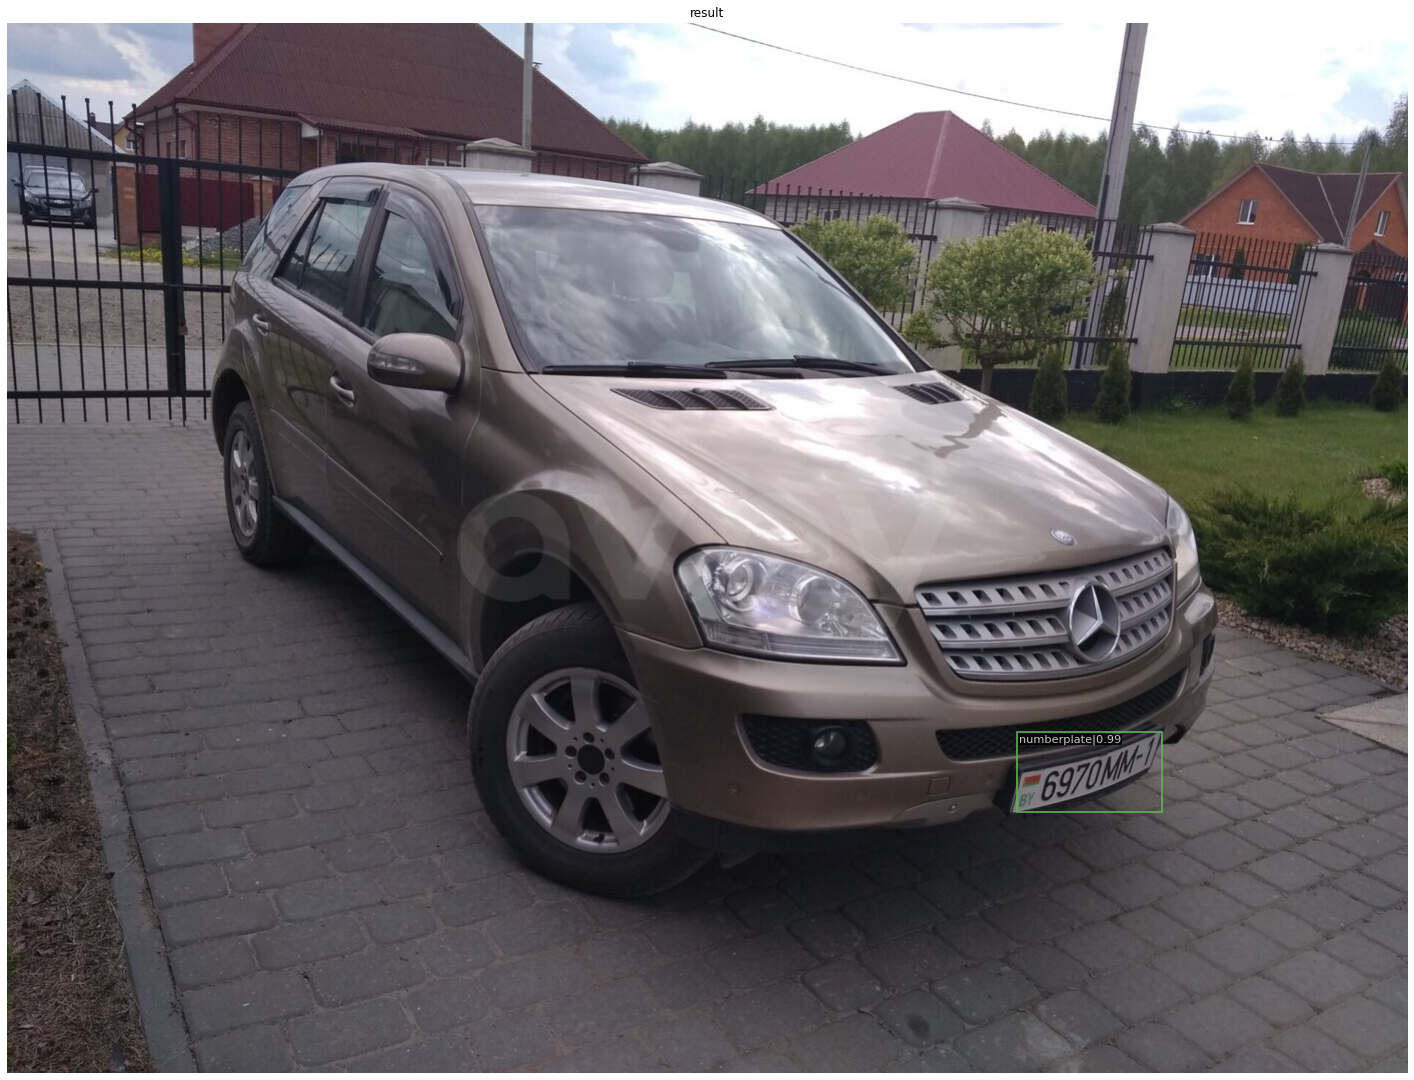

In [38]:
img = mmcv.imread('example_images/ex1.jpg')
model.cfg = cfg
result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.3)